# Coordinates
When dealing with satellites, numerus coordinates frames are used.


In [17]:
import pymap3d as pm
import matplotlib.pyplot as plt
import numpy as np


Text(0, 0.5, 'latitude [deg]')

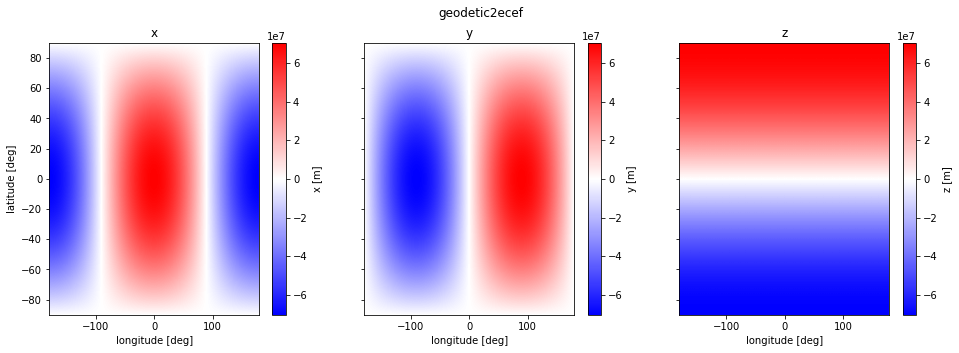

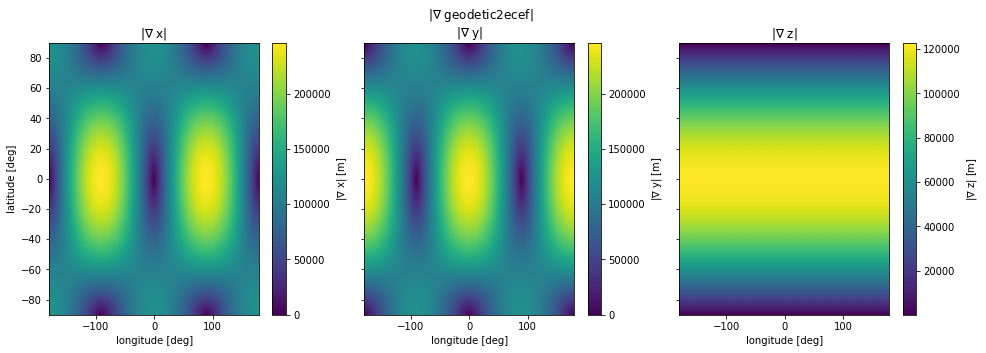

In [18]:


lat, lon = np.meshgrid(np.arange(-90, 90, 0.1), np.arange(-180, 180, 0.2))

x, y, z = pm.geodetic2ecef(lat, lon, 64000000)


def panel(ax, val: np.ndarray, name: str, cmap: str = None):
    hi = ax.pcolormesh(lon, lat, val, cmap=cmap)
    ax.set_title(name)
    fg.colorbar(hi, ax=ax).set_label(name + " [m]")
    ax.set_xlabel("longitude [deg]")


fg = plt.figure(figsize=(16, 5))
axs = fg.subplots(1, 3, sharey=True)
fg.suptitle("geodetic2ecef")

panel(axs[0], x, "x", "bwr")
panel(axs[1], y, "y", "bwr")
panel(axs[2], z, "z", "bwr")

axs[0].set_ylabel("latitude [deg]")


fg = plt.figure(figsize=(16, 5))
axs = fg.subplots(1, 3, sharey=True)
fg.suptitle(r"|$\nabla$ geodetic2ecef|")


panel(axs[0], np.hypot(*np.gradient(x)), r"|$\nabla$ x|")
panel(axs[1], np.hypot(*np.gradient(y)), r"|$\nabla$ y|")
panel(axs[2], np.hypot(*np.gradient(z)), r"|$\nabla$ z|")

axs[0].set_ylabel("latitude [deg]")



# Sun position

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f536f779820>

In [21]:
from astropy.coordinates import get_sun
from astropy.time import Time

In [26]:
noon = Time('2012-7-13 12:00:00')

In [29]:
sun = get_sun(noon)

In [36]:
sun.cartesian

<CartesianRepresentation (x, y, z) in AU
    (-0.36940194, 0.86890458, 0.37668678)>

In [39]:
sun

<SkyCoord (GCRS: obstime=2012-07-13 12:00:00.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (113.03205392, 21.75010468, 1.01653622)>

Maybe it is best ot adapt thze code of :
    https://github.com/geospace-code/pymap3d/blob/master/src/pymap3d/eci.py